In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

### Number of Instances:
    20640
### Number of Attributes:
    8 numeric predictive attributes and the target
    

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train_full, X_test, y_train_full , y_test = train_test_split(housing.data, housing.target, random_state=42)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_valid = scaler.transform(X_valid)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
np.random.seed(42)

In [14]:
tf.random.set_seed(42)

In [15]:
X_train.shape

(11610, 8)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) ##     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

In [19]:
model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 967us/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 987us/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 883us/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 942us/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 945us/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 871us/ste

In [20]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 722us/step - loss: 0.3942 - mae: 0.4502


In [21]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

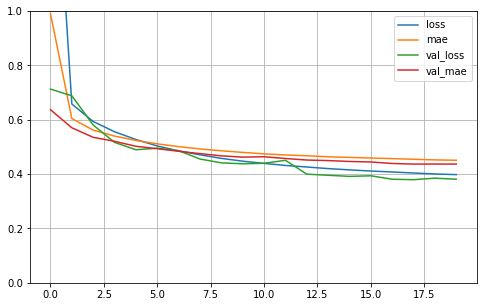

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
X_new = X_test[:3]

In [24]:
y_proba = model.predict(X_new)

In [25]:
y_proba.round(2)

array([[0.53],
       [1.89],
       [3.4 ]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)

In [27]:
y_pred

array([[1],
       [1],
       [1]], dtype=int32)

## Delete previous model

In [29]:
del model

In [ ]:
keras.backend.clear_session() ##Free the resources

## Functional API

    create each of layers in form of function
    
            Output
    
         /  Concat
    
       /     Hidden 2
     Wide (because our input is directly going for output as well)
       \                                      Deep (because our input is going through to two layer of dense hidden layer)
         \  Hidden 1
            
           \ Input
    

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) ##input layer
hidden1 = keras.layers.Dense(30, activation="relu")(input_) ##dense layer (hidden layer 1) with 30 neurons using relu activation nd we called input layer like as a function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)## hidden layer 2 passing hidden layer 1 as function
concat = keras.layers.concatenate([input_, hidden2]) ## just merging output of hidden layer and all the inputs
output = keras.layers.Dense(1)(concat) #output layer without any activation function with a single neuron
model = keras.models.Model(inputs=[input_], outputs=[output])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

In [32]:
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

In [33]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.6311 - mae: 1.2215 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/20
363/363 [==============================] - 0s 969us/step - loss: 0.7247 - mae: 0.6113 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/20
363/363 [==============================] - 0s 942us/step - loss: 0.6447 - mae: 0.5825 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6127 - mae: 0.5669 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5640 - mae: 0.5459 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/20
363/363 [==============================] - 0s 952us/step - loss: 0.5332 - mae: 0.5312 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/20
363/363 [==============================] - 0s 927us/step - loss: 0.5296 - mae: 0.5245 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - 

In [34]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 840us/step - loss: 0.4007 - mae: 0.4556


In [35]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980843544006,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.4589638411998749,
  0.4502205550670624,
  0.4432659149169922,
  0.43632543087005615,
  0.4306245744228363,
  0.4253448247909546,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.40958571434020996],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.5581423044204712,
  0.542133629322052,
  0.5297517776489258,
  0.518592119216919,
  0.5096290111541748,
  0.502535879611969,
  0.49592792987823486,
  0.4896959960460663,
  0.4850703179836273,
  0.48114877939224243,
  0.47657036781311035,
  0.47358450293540955,
  0.4702606499195099,
  0.4675999581813812,
  0.4649639427661896,
  0.46159064769744873,
  0.46004417538642883],
 'val_loss': [0.879798412322998,
  0.6420254707336426,
  0.589079737663269,
  0.54546719789505,
  

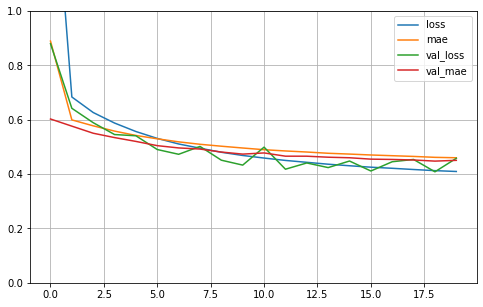

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Saving and Restoring

In [39]:
model.save("my_Func_model.h5")

In [38]:
%pwd

'/home/dev/Documents/DeepLearning'

In [40]:
%cd /home/dev/Documents/DeepLearning

/home/dev/Documents/DeepLearning


In [41]:
del model

In [42]:
keras.backend.clear_session()

In [43]:
model = keras.models.load_model("my_Func_model.h5")

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

In [45]:
y_pred = model.predict(X_new)

In [46]:
print(y_pred)

[[0.6996867]
 [1.662176 ]
 [3.4106686]]


## Using Callbacks during Training

In [47]:
keras.backend.clear_session()

In [48]:
np.random.seed(42)

In [49]:
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [53]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 992us/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 838us/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 875us/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 819us/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 816us/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 766us/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 786us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 823us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 810us/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 808us/step - loss: 0.454

In [54]:
del model
keras.backend.clear_session()

In [57]:
model = keras.models.load_model("Model-10.h5")

In [58]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 621us/step - loss: 0.4382


## Best Model Only

In [59]:
del model 
keras.backend.clear_session()

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [61]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [62]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5")

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [64]:
###patience : number of epochs with no improvement after which taining will be stopped

In [65]:
history = model.fit(X_train,y_train, epochs=200, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 3.4726 - val_loss: 1.4007
Epoch 2/200
363/363 [==============================] - 0s 837us/step - loss: 0.8430 - val_loss: 1.3632
Epoch 3/200
363/363 [==============================] - 0s 956us/step - loss: 0.7195 - val_loss: 0.8402
Epoch 4/200
363/363 [==============================] - 0s 831us/step - loss: 0.6417 - val_loss: 0.5897
Epoch 5/200
363/363 [==============================] - 0s 823us/step - loss: 0.5714 - val_loss: 0.5373
Epoch 6/200
363/363 [==============================] - 0s 876us/step - loss: 0.5392 - val_loss: 0.5175
Epoch 7/200
363/363 [==============================] - 0s 967us/step - loss: 0.5216 - val_loss: 0.4717
Epoch 8/200
363/363 [==============================] - 0s 926us/step - loss: 0.4788 - val_loss: 0.4582
Epoch 9/200
363/363 [==============================] - 0s 852us/step - loss: 0.4631 - val_loss: 0.4201
Epoch 10/200
363/363 [==============================] - 0s 873us/step - los

In [66]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 682us/step - loss: 0.3743
